In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [55]:
#pip install mlxtend 

# Run the code below if you want to train the model on generated data for binary classification

<ipython-input-118-0b3f10500d4e>:7: RuntimeWarning: covariance is not positive-semidefinite.
  x,y= np.random.multivariate_normal(mean, cov, N_sample).T
<ipython-input-118-0b3f10500d4e>:8: RuntimeWarning: covariance is not positive-semidefinite.
  x1,y1 = np.random.multivariate_normal(mean,cov,2).T


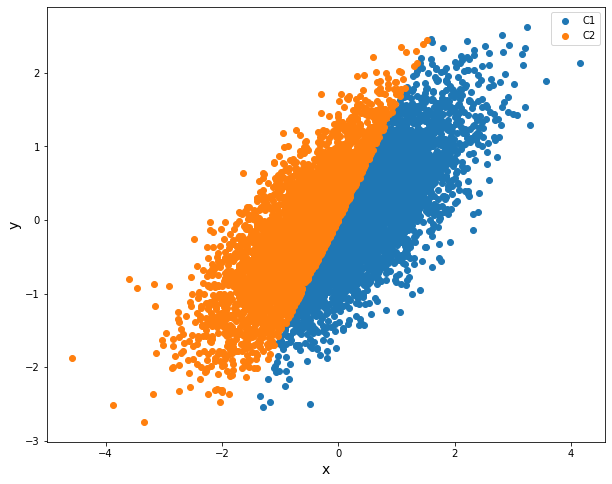

In [118]:
np.random.seed(12346)

# this code is used to generate data 
mean = [0,0]
N_sample = 8000
cov = [[1, 0.6], [0.5, 0.6]] 
x,y= np.random.multivariate_normal(mean, cov, N_sample).T
x1,y1 = np.random.multivariate_normal(mean,cov,2).T
theta=[x1[0],y1[0]]

data = np.array([x[0],y[0]])
label=np.array([(np.sign(np.dot(theta,[x[0],y[0]]))+1)/2])
C1= np.array([]) #class with index 0
C2=np.array([]) ##class with index 1

for i in range(N_sample):
    label =np.append(label,(np.sign(np.dot(theta,[x[i],y[i]]))+1)/2)
    data = np.append(data,[x[i],y[i]],axis=0) 

data = data.reshape(int(data.shape[0]/2),2)  
x_train, x_test,y_train,y_test =train_test_split(data,label,test_size=0.2,random_state =1234)

x_val, x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.2,random_state =1234)


for i in range(N_sample):
    if label[i]==0:
        C1= np.append(C1,data[i],axis=0)
    else:
        C2= np.append(C2,data[i],axis=0)
        
C1=C1.reshape(int(C1.shape[0]/2),2)
C2=C2.reshape(int(C2.shape[0]/2),2) 
#plt.plot(x,y)  
plt.figure(figsize=(10,8))
plt.scatter(C1[:,0],C1[:,1],label='C1')
plt.scatter(C2[:,0],C2[:,1],label ='C2')
plt.xlabel('x',size= 14)
plt.ylabel('y',size=14)
plt.legend()
plt.show()

# Run the code below if you want to train the model on breast cancer data for binary classification

In [85]:

bc = datasets.load_breast_cancer()
x,y = bc.data,bc.target
data,label = x/np.max(x),y

n_samples, n_features =  x.shape

x_train, x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state =1234)
x_val, x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.2,random_state =1234)

#scale

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_val = sc.fit_transform(x_val)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_val = x_val.astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_val = y_val.astype(np.float32)

# Run the code below if you want to train the model on MNIST data

In [101]:
 # this bloc is used to import the dataset 
X_mnist,y_mnist=fetch_openml('mnist_784',version=1,return_X_y=True)


For the binary classification, run the bloc below

In [102]:
X_train = np.vstack((X_mnist[np.where(y_mnist =='0')],X_mnist[np.where(y_mnist=='1')]))/255
Y_train = np.append(y_mnist[np.where(y_mnist =='0')],y_mnist[np.where(y_mnist=='1')])
x_train, x_test,y_train,y_test =train_test_split(X_train,Y_train,test_size=0.1,random_state =1234)
x_val, x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.2,random_state =1234)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_val = x_val.astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_val = y_val.astype(np.float32)

For the next step run the class model

To rund the model in 3 classes classification, run the following code to upload the dataset.

In [58]:
X_train = np.vstack((X_mnist[np.where(y_mnist =='0')],X_mnist[np.where(y_mnist=='1')],X_mnist[np.where(y_mnist =='2')]))/255
Y_train = np.append(y_mnist[np.where(y_mnist =='0')],y_mnist[np.where(y_mnist=='1')])
Y_train =np.append(Y_train,y_mnist[np.where(y_mnist=='2')])

x_train, x_test,y_train,y_test =train_test_split(X_train,Y_train,test_size=0.1,random_state =1234)
x_val, x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.2,random_state =1234)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_val = x_val.astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_val = y_val.astype(np.float32)

# The design ML model is as follow

reference for cross entropy error https://link.springer.com/chapter/10.1007/978-3-319-48390-0_10

In [119]:
class Model:
    def __init__(self,n_input,n_output):
        super(Model,self).__init__()
        self.n_input = n_input
        self.n_output = n_output 
        self.w = np.random.randn(self.n_input,self.n_output)
        
    def forward(self,x):
        out= np.dot(x,self.w)
        
        if self.n_output==2:
            out=self.Sigmoid(out)
            return out 
        
        elif self.n_output>2:
            out = self.Softmax(out)
            return out
    
        
    def CroosEntropyLoss(self,out,label):
        if self.n_output==2 :
            return -label*np.log(out[0])-(1-label)*np.log(1-out[0])
        
        elif self.n_output >2:
            z=np.zeros(self.n_output)   # cost = sum(z^ilog(y_pred^i))
            z[int(label)]=1
            
            return -np.sum(z*np.log(out)) 
        
        
    def Sigmoid(self,x):
        v= np.array([])
        for i in range(x.shape[0]):
            v=np.append(v,1/(1+np.exp(-x[i])))
        return v
    
    
    def Backward(self,x,out,label):
        s=np.zeros(self.n_output)
        s[int(label)]=label
        pred= out-s
        gra = np.zeros((self.n_input,self.n_output) ) # creat matrix with same structure as W
        for i in range(x.shape[0]):
            gra.T[:,i]= pred*out*(1-out).T*x[i] # this use to comput Dw_j =(sigma(.)-y_true)sigma(x_j)(1-sigma(x_j))input 
            
        return gra
    
    
    def Optimizer(self,lr,Dw,lam,momentum=0,L2=True,NAG=False,SGD=False):
        """L2 for Regularizer, NAG for Nesterov Accelerate Gradient method and SGD for stockastic gradient descent"""
        
        if L2==True and NAG ==False and SGD== False:
            self.w = self.w - lr*Dw + lam*self.w
            
        elif L2==False and NAG ==False and SGD== True:
            self.w = self.w - lr*Dw
            
        elif L2==False and NAG ==True and SGD== False:
            w1  = self.w - lr*Dw
            self.w = w1 + momentum*(w1-self.w)
            
        
        
    def L2Regularization(self,lam,L2):
        """ lam is the parameter use to avoid over-fitting of weight"""
        if L2 == True : 
            return lam*0.5*(self.w**2).sum()
        else:
            return 0 
        
        
        
    def Softmax(self,x):
        v= np.array([])
        for i in range(x.shape[0]):
            v=np.append(v,np.exp(x[i])/np.sum(np.exp(x))) 
        return v
    
    
    def Schedule(self,epoch):

        if epoch <80:
            self.lr= 0.7
        if (epoch>80)&(epoch<150):
            self.lr=0.05
        if (epoch>150)&(epoch<400):
            self.lr=0.005
        if epoch>400:
            self.lr=0.005

        return self.lr
    
    
    def accuracy(self,x_test,y_test):
        compt = 0
        
        for sample,label in zip(x_test,y_test):
            y_pred = self.forward(sample.flatten())
            i, = np.where(y_pred==np.max(y_pred))
            
            if int(i[0])==int(label):
                compt += 1
        return compt/x_test.shape[0]
        
    
    
    def Prediction(self,x_test):
        y_p = []
        
        for samples in x_test:
            y_pred = self.forward(samples.flatten())
            i, = np.where(y_pred==np.max(y_pred)) #here we record the maximun value index from y_pred
            y_p.append(i[0])
        return np.array(y_p)
    
    
    
    def  Loss(self,x_test,y_test):
        los=0
        n_samples = x_test.shape[0]
        compt = 0
        for sample, label in zip(x_test,y_test):
            sample = sample.flatten() 
            y_pred = self.forward(sample)
            los = los + self.CroosEntropyLoss(y_pred,label)
            
        return los/n_samples
        
    

def shuffle(x_train,y_train):
    """This function is used to shuffle the input data"""
    shuffler = np.random.permutation(len(x_train))
    return x_train[shuffler],y_train[shuffler]

        
        
          
        

##  The following code is used to run the dataset in minibatch 

>

epoch = 1,   batch =32, Train_loss=0.9314, Val_loss=0.9538, acc_val =0.57,acc_train=0.55,lr=0.7
>>

epoch = 3,   batch =32, Train_loss=0.8070, Val_loss=0.8216, acc_val =0.97,acc_train=0.97,lr=0.7
>>

epoch = 5,   batch =32, Train_loss=0.7491, Val_loss=0.7616, acc_val =0.96,acc_train=0.96,lr=0.7
>>

epoch = 7,   batch =32, Train_loss=0.7317, Val_loss=0.7327, acc_val =0.96,acc_train=0.96,lr=0.7
>>

epoch = 9,   batch =32, Train_loss=0.7137, Val_loss=0.7149, acc_val =0.97,acc_train=0.96,lr=0.7
>>

epoch = 11,   batch =32, Train_loss=0.7025, Val_loss=0.7025, acc_val =0.97,acc_train=0.97,lr=0.7
>>

epoch = 13,   batch =32, Train_loss=0.6975, Val_loss=0.7012, acc_val =0.97,acc_train=0.97,lr=0.7
>>

epoch = 15,   batch =32, Train_loss=0.6944, Val_loss=0.6941, acc_val =0.98,acc_train=0.97,lr=0.05
>>

epoch = 17,   batch =32, Train_loss=0.6944, Val_loss=0.6942, acc_val =0.98,acc_train=0.97,lr=0.05
>>

epoch = 19,   batch =32, Train_loss=0.6937, Val_loss=0.6942, acc_val =0.98,acc_train=0.97,l

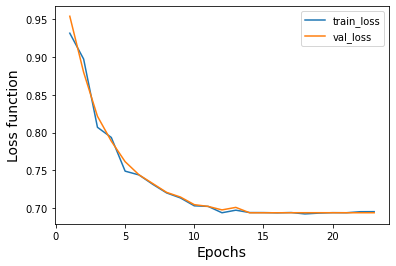

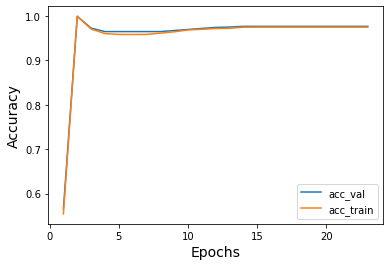

In [111]:
n_samples = x_train.shape[0]
hist =[]                     # this will be used to record the training loss 
hist_val=[]                  # this will be used to record the validation loss 
acc_val =np.array([])        # this will be used to record the validation accuracy
acc_train =np.array([])
batch_size = 32         # for large dataset, use 32

epochs = 23

momentum = 0.5   # this is used for NAG
NAG = False      # Nesterov Accelerated Gradient
L2 =True         # L2 regularizer 
sgd=False        # Stochastic Gradient Descen 
lam = 0.00001  # parameter for L2 regularizer
n_input = x_train[0].flatten().shape[0]  
n_output = int(np.max(y_test)+1)  # this is used to record the number output label

net = Model(n_input,n_output)     # this is used to creat our model

for epoch in range(epochs):
    
    lr= net.Schedule(epoch) #  learning rate

    
    x_train,y_train = shuffle(x_train,y_train) # this function is use to shuflle the data
    
    data =np.array_split(x_train,batch_size) # this is using to split data in batch_size mini-batch
    label=np.array_split(y_train,batch_size)
    compt=0
    
    for train_x, train_y in zip(data,label):
        
        Dw=0
        los=0
        n_samples = train_x.shape[0]

        for sample, label in zip(train_x[:n_samples],train_y[:n_samples]):

            sample = sample.flatten()
            y_pred = net.forward(sample)
            los = los + net.CroosEntropyLoss(y_pred,label) 
            Dw += net.Backward(sample,y_pred,label)


        net.Optimizer(lr,Dw/n_samples,lam,momentum=momentum,L2=L2,NAG=NAG,SGD=sgd ) #update the weight 

    los = los/n_samples + net.L2Regularization(lam,L2)
    
    acc = net.accuracy(x_val,y_val)
    acc_1 =net.accuracy(x_train,y_train)
    acc_val = np.append(acc_val,acc)
    acc_train = np.append(acc_train,acc_1)
    
    val_loss = net.Loss(x_val,y_val)
    hist_val.append(val_loss)
    hist.append(los)
    
    print('>',end='')

    if epoch%2 ==0:
        print('\n')
        print(f'epoch = {epoch+1},   batch ={batch_size}, Train_loss={los:.4f}, Val_loss={val_loss:.4f}, acc_val ={acc:.2f},acc_train={acc_1:.2f},lr={lr}')

print('\n')
print('End training')
print('\n')

print(f'The test accuracy is {net.accuracy(x_test,y_test)}')


x=np.arange(1,epochs+1)
plt.plot(x,hist,label='train_loss')
plt.plot(x,hist_val,label='val_loss')
plt.xlabel('Epochs',size=14)
plt.ylabel('Loss function',size=14)
plt.legend()
plt.show()
plt.plot(x,acc_val,label='acc_val')
plt.plot(x,acc_train,label='acc_train')
plt.xlabel('Epochs',size=14)
plt.ylabel('Accuracy',size=14)
plt.legend()
plt.show()

In [112]:
# we use this code to make prediction

y_pred = net.Prediction(x_test)
print(y_pred)
print('\n')
print(y_test)

[0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0
 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0]


[0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.

In [99]:
print(f'the value of the loss fucntion on the test data is { net.Loss(x_test,y_test)}')

the value of the loss fucntion on the test data is 0.6593126777643131


# The following result is the result getting using breast cancer datset

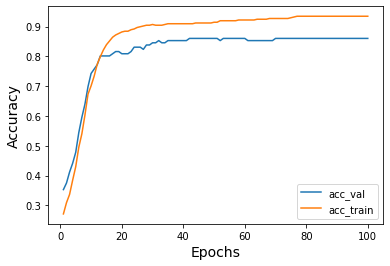




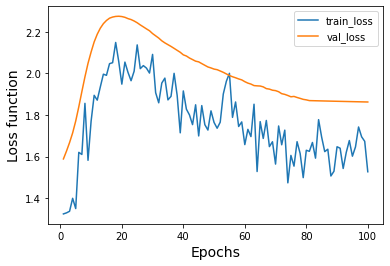
The model peforme well in the training with a max accuracy arround $0.97$ but the test acuracy was $0.42$, this is due to the fact that, the data are umbalence. 

# The following result was getting using MNIST dataset for 3 Classification (0,1 and 2)

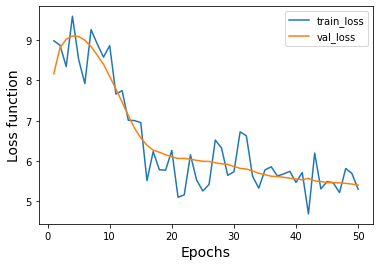

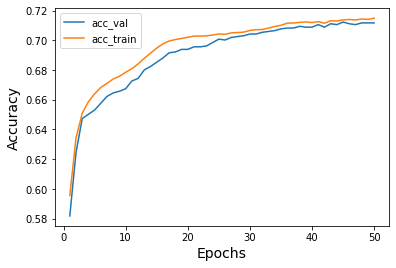
For this training, we stop the training early. A long training process will improve the accuracy.


# The following code is used to run the model without consider the minbatches.

>

epoch =1,   Train_loss=0.8635, Val_loss= 0.8293, acc_train = 0.80,acc_val =0.7937, lr=0.7
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

End training 

the test accuracy is 0.8161993769470405


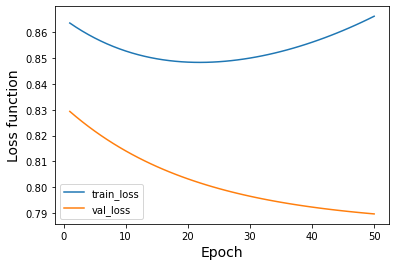

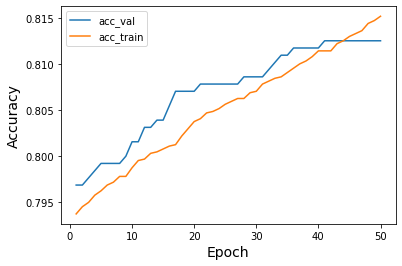

In [121]:

# this code is using for no batches
n_samples = x_train.shape[0]
#lr =0.05 # learning rate

momentum = 0.005
NAG = False
L2 =True
sgd=False
lam = 0.01  # parameter for L2 regularizer
n_input = x_train[0].flatten().shape[0]
#n_input = x_train[0].shape[0]
n_output = int(np.max(y_test)+1)

net = Model(n_input,n_output)
hist =[]
hist_val = []

acc_val =np.array([])
acc_train =np.array([])


epochs = 50
for epoch in range(epochs):
    Dw=0
    los=0
    val_loss=0
    lr= net.Schedule(epoch) #  learning rate schedule, the value depend on the epoch

    for sample, label in zip(x_train,y_train):
        
        sample = sample.flatten()
        y_pred = net.forward(sample)
        los = los + net.CroosEntropyLoss(y_pred,label) 
        Dw += net.Backward(sample,y_pred,label)
       
    
    net.Optimizer(lr,Dw/n_samples,lam,momentum=momentum,L2=L2,NAG=NAG,SGD=sgd ) #update the weight
    acc = net.accuracy(x_val,y_val)
    acc_1 =net.accuracy(x_train,y_train)
    acc_val = np.append(acc_val,acc)
    acc_train = np.append(acc_train,acc_1)
    
    los = los/n_samples + net.L2Regularization(lam,L2)
    val_loss = net.Loss(x_val,y_val)
    hist_val.append(val_loss)
    hist.append(los)
    
    print('>',end='')
        
    
    if epoch%50 ==0:
        print('\n')
        print(f'epoch ={epoch+1},   Train_loss={los:.4f}, Val_loss= {val_loss:.4f}, acc_train = {acc:.2f},acc_val ={acc_1:.4f}, lr={lr}')
    
print('\n')    
print('End training \n')


print(f'the test accuracy is {net.accuracy(x_test,y_test)}')

x=np.arange(1,epochs+1)
plt.plot(x,hist,label='train_loss')
plt.plot(x,hist_val,label='val_loss')
plt.xlabel('Epoch',size=14)
plt.ylabel('Loss function',size=14)
plt.legend()
plt.show()
plt.plot(x,acc_val,label='acc_val')
plt.plot(x,acc_train,label='acc_train')
plt.xlabel('Epoch',size=14)
plt.ylabel('Accuracy',size=14)
plt.legend()
plt.show()

# To plot the confusion matrix of the model on the test data, use the following code

In [ ]:
# we use this code to make prediction
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

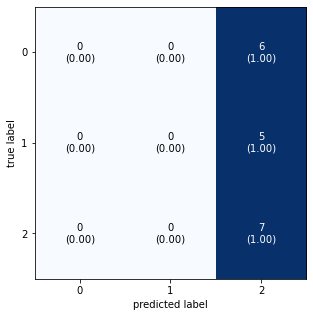

In [46]:

y_pred = net.Prediction(x_test)
out = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=out, figsize=(5,5),show_normed= True)


# cross validation

In [86]:
KC = 5 # K-fold cross 

data,label_data =shuffle(data,label)
data =np.array_split(data,KC) # this is using to split data in k-fold cross
label_data=np.array_split(label_data,KC)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>KC = 1/5,epoch =100, \lambda = 0.01
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

<ipython-input-84-16d9a9f4ce61>:34: RuntimeWarning: overflow encountered in exp
  v=np.append(v,1/(1+np.exp(-x[i])))


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>KC = 1/5,epoch =200, \lambda = 0.01
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>KC = 2/5,epoch =100, \lambda = 0.01
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>KC = 2/5,epoch =200, \lambda = 0.01
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>KC = 3/5,epoch =100, \lambda = 0.01
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>KC = 3/5,epoch =200, \lambda = 0.01
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>KC = 4/5,epoch =100, \lambda = 0.01
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>KC = 4/5,epoch =200, \lambda = 0.01
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

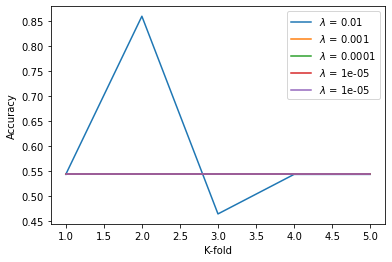

In [87]:

n_samples = x_train.shape[0]
momentum = 0.005
NAG = False
L2 =True
sgd=False
n_input = x_train[0].flatten().shape[0]
n_output = int(np.max(y_test)+1)

regu_lenght = [0.01,0.001,0.0001,0.00001,0.00001]
epochs = 200

kc = np.arange(1,KC+1)

for lam in regu_lenght:
    acc = [] 
    for i in range(KC):
        net = Model(n_input,n_output)
        data_test = iter(data)
        label_test = iter(label_data)
        x_test =next(data_test)
        y_test = next(label_test)

        for epoch in range(epochs):

            lr= net.Schedule(epoch) #  learning rate
            compt=0

            for train_x, train_y in zip(data,label_data):

                if compt !=i : # this is used to skip the test_data
                    Dw=0
                    n_samples = train_x.shape[0]

                    for sample, label in zip(train_x[:n_samples],train_y[:n_samples]):

                        sample = sample.flatten()
                        y_pred = net.forward(sample) 
                        Dw += net.Backward(sample,y_pred,label)
                    net.Optimizer(lr,Dw/n_samples,lam,momentum=momentum,L2=L2,NAG=NAG,SGD=sgd ) #update the weight

                compt +=1

            print('>',end='')

            if (epoch+1)%100 ==0:
                print(f'KC = {i+1}/{KC },epoch ={epoch+1}, lambda = {lam}')

        acc.append(net.accuracy(x_test,y_test))
    
    plt.plot(kc,acc,label=f'$\lambda$ = {lam}')
    
print(f'End cross validation')
plt.xlabel('K-fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()





# Result for artificial dataset


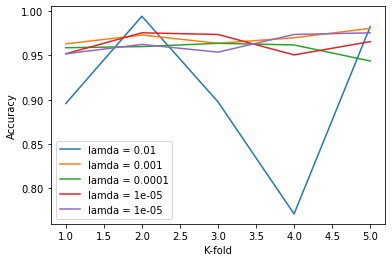
 
This graph was obtained for binary class classification using the artificial dataset.\
For $\lambda = 0.01$ the maximun and minimal value of accuracy using the model are around $0.98$ and $0.75$ \
For $\lambda = 10^{-5}$ the maximun and minimal value of accuracy using the model are around $0.97$ and $0.95$ \
From analysis, we conclue the best value of $\lambda$ for this model is $10^{-5}$


r$\lambda$


# The result for breast cancer using cross validation 

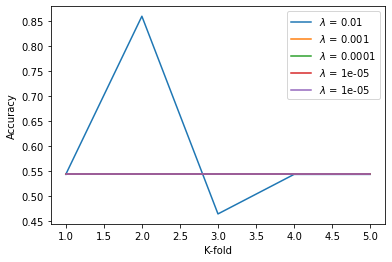
Tis graph, we can notice that using most of the value of $\lambda$ give accuracy around $0.5$. 
The value of $\lambda$ which can give best accuray and minimal is $ 0.01$